In [23]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
from networkx import NetworkXError
from networkx.utils import not_implemented_for
from networkx.algorithms.community.community_utils import is_partition
from sklearn.metrics import silhouette_score
from scipy.sparse import lil_matrix
from networkx.algorithms.community import quality
import seaborn as sns
import os
import time
%matplotlib inline


In [2]:
tw = pd.read_csv('../data/twitter_10000.csv')
tw.head()

,start_node,end_node
0,0,31
1,1,161
2,2,178
3,3,170
4,4,199


Construct the data to graph representation and then visualize the graph

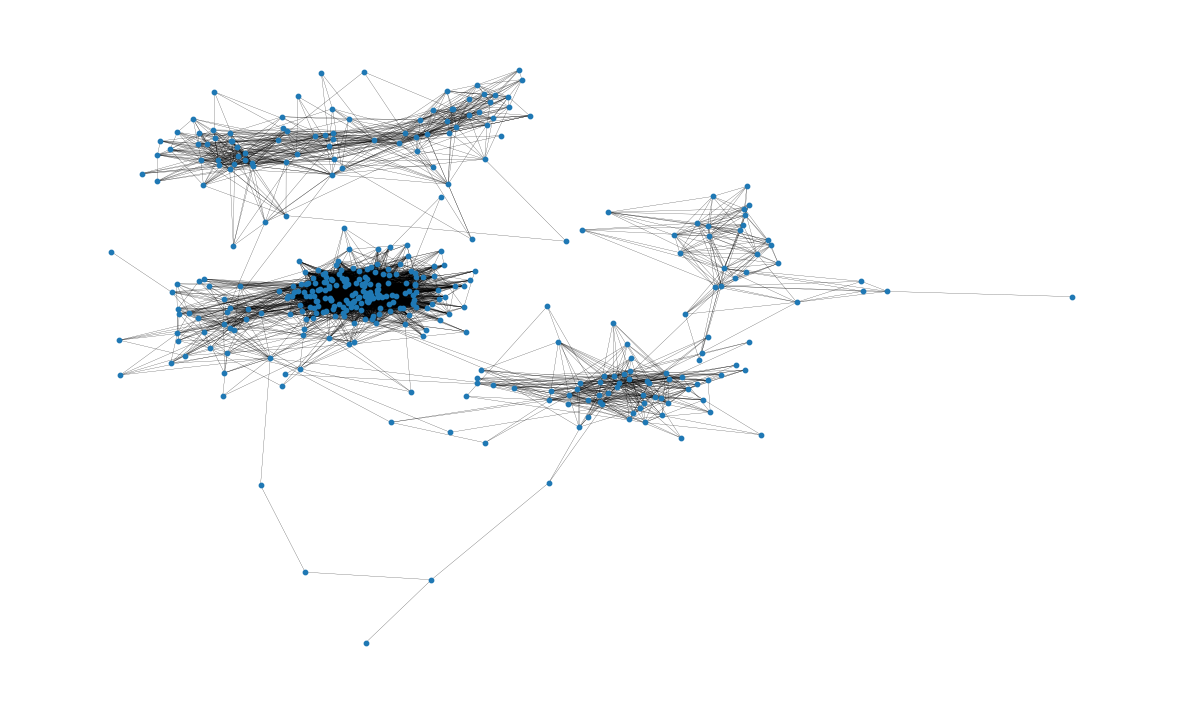

In [10]:
G = nx.from_pandas_edgelist(tw, "start_node", "end_node")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)
plt.savefig('../img/twitter_graph.png', dpi=600, bbox_inches='tight')

Exlore the dataset with some basic statistic

In [11]:
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
n_connected = nx.number_connected_components(G)
print("Number of nodes:", n_nodes)
print("Number of edges:", n_edges)
print("Number of connected components:", n_connected)

Number of nodes: 404
Number of edges: 7068
Number of connected components: 3


In [12]:
degree = nx.degree(G)
max_degree_node, max_degree = max(degree, key=lambda x: x[1])
print(f"The maximum degree is {max_degree} at node {max_degree_node}")

The maximum degree is 175 at node 109


## Louvain algorithm

In [13]:
start_time = time.time()
louvain_communities = list(nx.community.louvain_communities(G))
end_time = time.time()
louvain_time = end_time - start_time
print("Louvain method took {:.2f} seconds".format(end_time - start_time))

Louvain method took 0.13 seconds


In [14]:
print("Number of communities base on louvain method:", len(louvain_communities))
print("Community sizes:", [len(c) for c in louvain_communities])

Number of communities base on louvain method: 6
Community sizes: [91, 79, 85, 32, 50, 67]


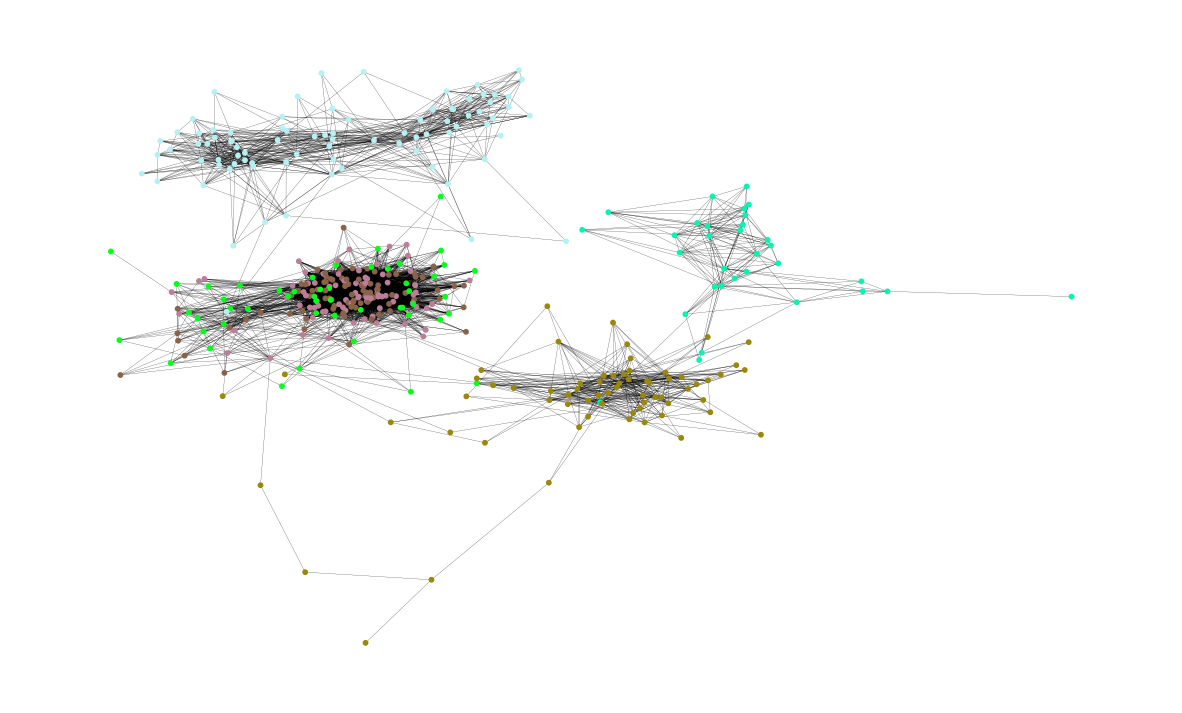

In [15]:

colors = ["" for x in range(G.number_of_nodes())]
for com in louvain_communities:
    color = "#%06X" % np.random.randint(0, 0xFFFFFF)  # creates random RGB color
    for node in list(com):
        colors[node] = color
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)
plt.savefig('../img/twitter_louvain.png', dpi=600, bbox_inches='tight')

## Girvan Newman algorithm


In [16]:
start_time = time.time()
GN_communities = list(nx.community.girvan_newman(G))
end_time = time.time()
gn_time = end_time - start_time
print("Time to compute GN algorithm:", gn_time)
print("Number of communities base on GN method:", len(GN_communities))
print("Community sizes:", [len(c) for c in GN_communities])


Time to compute GN algorithm: 1112.3764536380768
Number of communities base on GN method: 401
Community sizes: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 

With number of community is 4,5 and 6

In [17]:
def plot_communities(G, colors, pos):
    """Plot Communities."""
    plt.figure(figsize=(15, 9))
    plt.axis("off")
    nx.draw_networkx(
        G,
        pos=pos,
        node_size=10,
        with_labels=False,
        width=0.15,
        node_color=colors,
        cmap=plt.cm.Set1,
    )

Community 0 : ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 352,

c:\Users\vu h huynh\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Community 1 : ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 352,

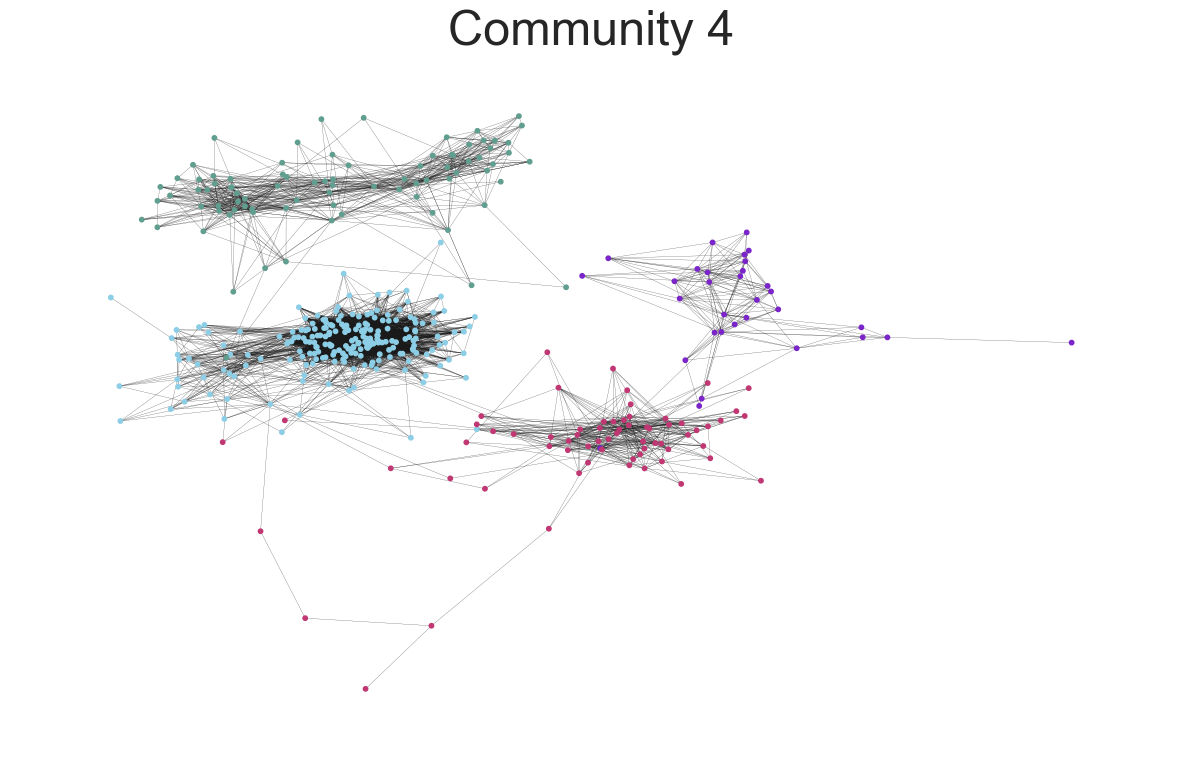

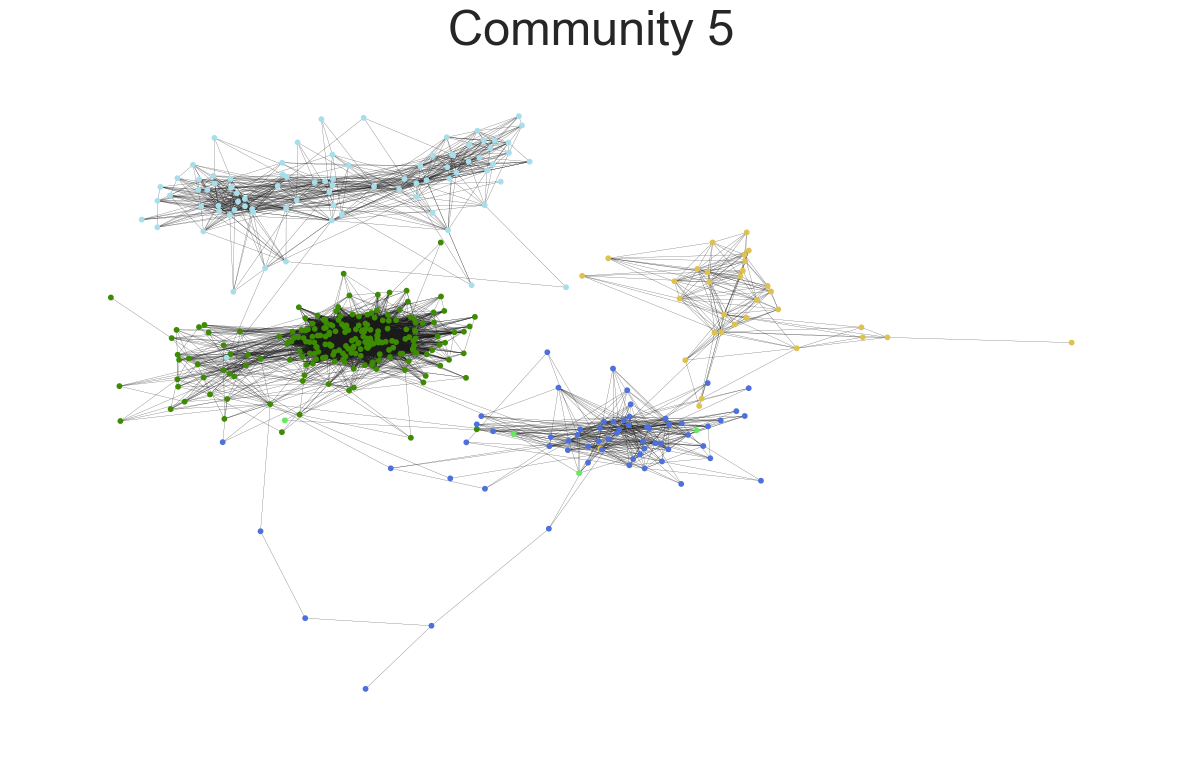

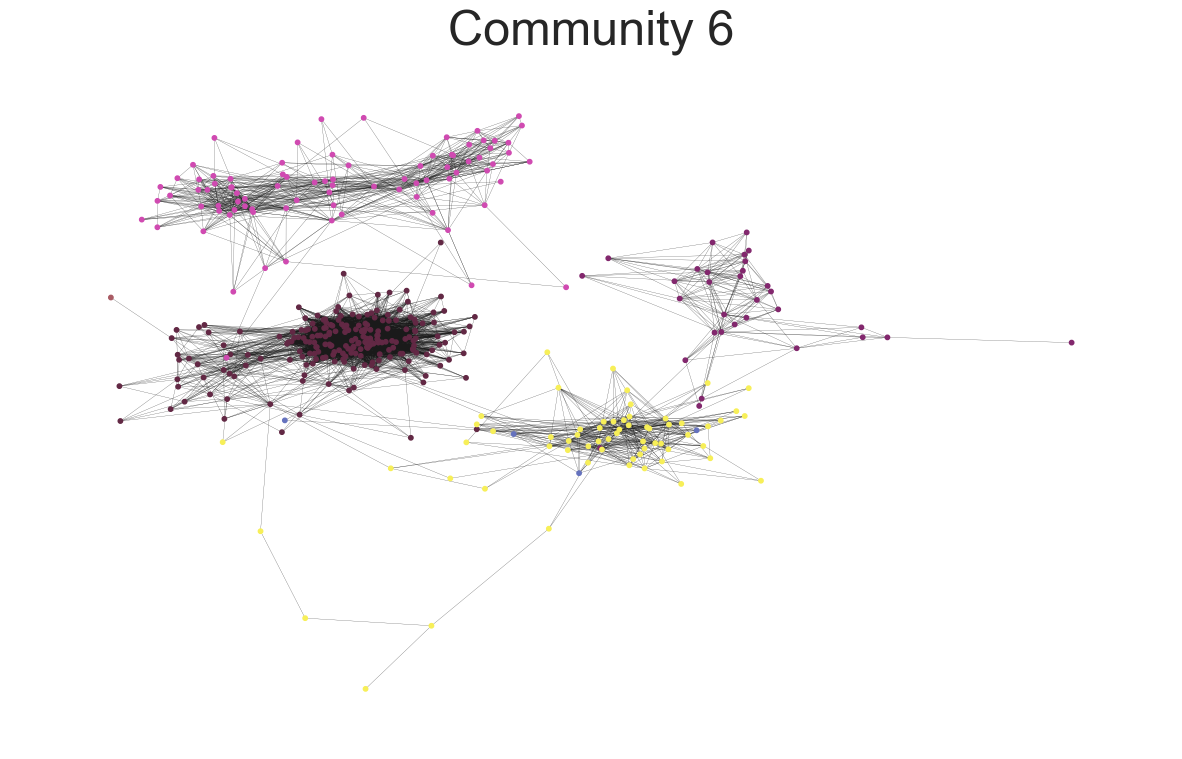

In [26]:
for i in range(3):
    print("Community", i, ":", GN_communities[i])
    communities = list(GN_communities[i])
    for com in communities:
        color = "#%06X" % np.random.randint(0, 0xFFFFFF)  # creates random RGB color
        for node in list(com):
            colors[node] = color
    plot_communities(G, colors, pos)
    plt.title("Community " + str(len(communities)), fontdict={"size": 35}, loc="center")
    plt.savefig('../img/twitter_gn_community_' + str(i) + '.png', dpi=600, bbox_inches='tight')
    


## Revise Girvan-Newman algorithm

The time complexity of Girvan-Newman algorithm is O(E^2*N), which is very computational expensive. Take a look in to the algorithm, there are some point we can modify to improve the coputational time of Girvan-Newman. 
 - The algorithm calculates edge betweeness in each loop, which make the algorithm so slow. We can improve by remove multiple edges with one calculation from the top of the betweeness list
 - Use approximate value of edge betweeness instead of using the exact value, since we only need the information of the highest betweeness edge. Based on this, we use Matteo Riondato et al. (2016) "Fast approximation of betweenness centrality through sampling" algorithm for the betweenness approximation.


In [19]:
from revised_Girvan_Newman import *

In [30]:
start_time = time.time()
for i in range(1):
    result = revised_girvan_quick(G)
GN_quick_communities = next(result)
end_time = time.time()
gn_quick_time = end_time - start_time
print("GN quick method took {:.2f} seconds".format(end_time - start_time))

GN quick method took 0.15 seconds


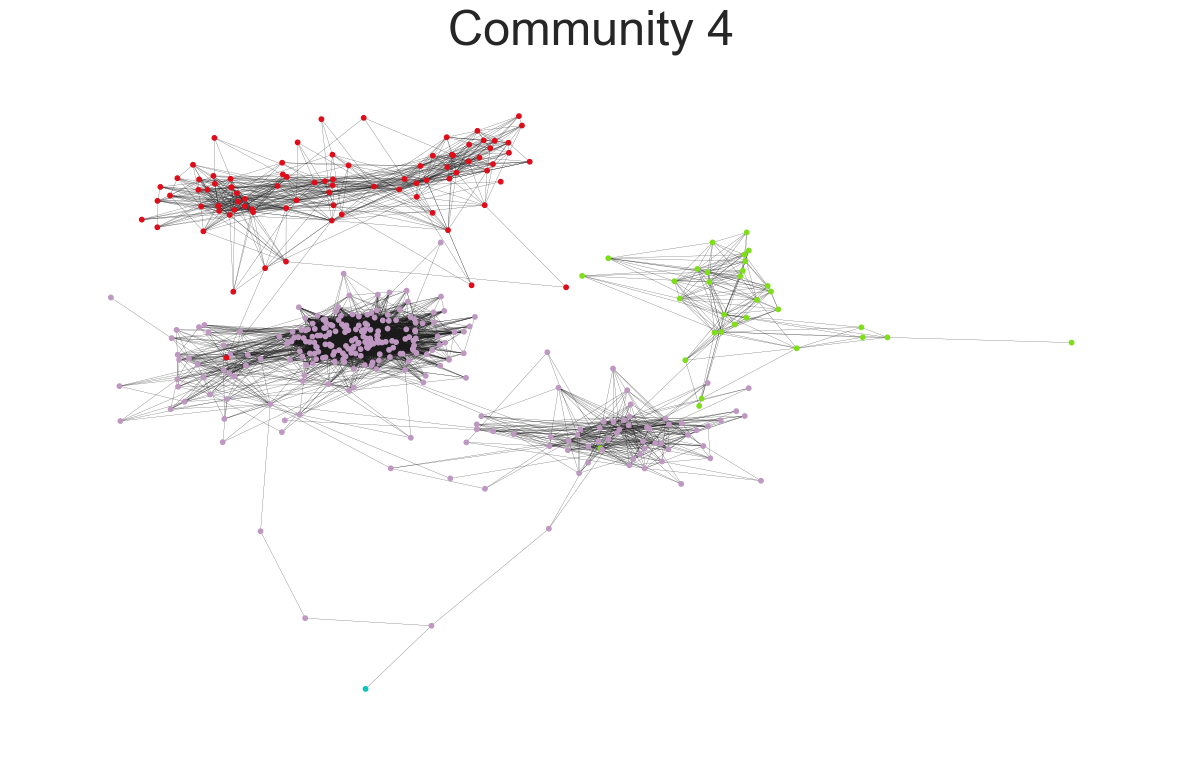

In [31]:
communities = list(GN_quick_communities)
for com in communities:
    color = "#%06X" % np.random.randint(0, 0xFFFFFF)  # creates random RGB color
    for node in list(com):
        colors[node] = color
plot_communities(G, colors, pos)
plt.title("Community " + str(len(communities)), fontdict={"size": 35}, loc="center")
plt.savefig('../img/twitter_gn_quick.png', dpi=600, bbox_inches='tight')


In [32]:
gn_time/gn_quick_time

7376.73544185517

With new method, the implementaton time is approximately 7000x faster!

### Compare the result

To compare the result of three individual method, we use 3 metrics: modularity, coverage and time.


In [33]:
methods, modularites,coverage, times = [],[],[],[]
methods.append("Louvain")
methods.append("Girvan-Newman")
methods.append("Girvan-Newman Quick")

modularites.append(nx.community.quality.modularity(G, louvain_communities))
modularites.append(nx.community.quality.modularity(G, GN_communities[0]))
modularites.append(nx.community.quality.modularity(G, GN_quick_communities))

coverage.append(quality.partition_quality(G, louvain_communities)[0])
coverage.append(quality.partition_quality(G, GN_communities[0])[0])
coverage.append(quality.partition_quality(G, GN_quick_communities)[0])

times.append(louvain_time)
times.append(1) # actually, it is the time for GN algorithm, to easily visualize, we set it to 1
times.append(gn_quick_time)


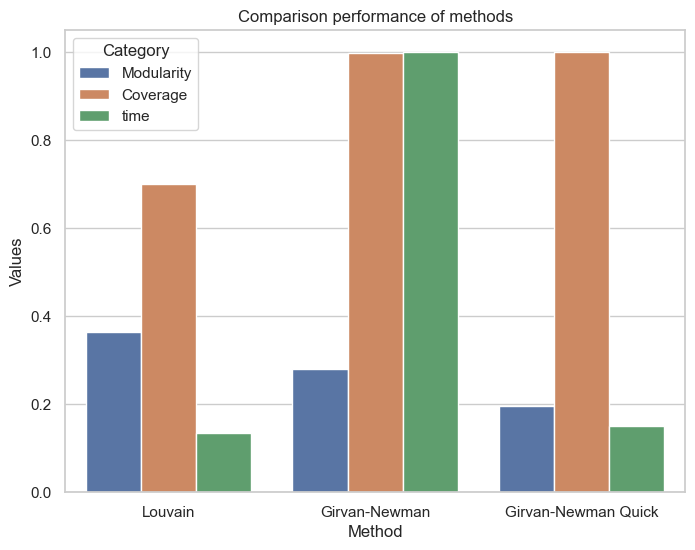

<Figure size 640x480 with 0 Axes>

In [34]:

df = pd.DataFrame({
    'Method': methods *3,
    'Modularity': modularites + coverage + times,
    'Category': ['Modularity'] * len(methods) + ['Coverage'] * len(methods) + ['time'] * len(methods)
})

# Set the style
sns.set(style="whitegrid")

# Create a bar plot with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Method', y='Modularity', hue='Category', data=df)
plt.title('Comparison performance of methods')
plt.xlabel('Method')
plt.ylabel('Values')

# Show the plot
plt.show()
plt.savefig('../img/twitter_performance.png', dpi=600, bbox_inches='tight')
